In [11]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

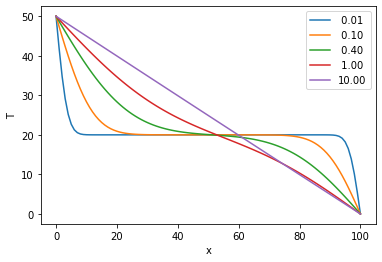

In [12]:
# forward-time centered-space: gradient + euler
L = 0.01
D = 4.25e-6 # thermal diffusivity
N = 100
a = L/N # unit spacing
h = 1e-4 # time step
eps = h/1000

T_l = 0
T_m = 20
T_h = 50

t_val = np.array([0.01, 0.1, 0.4, 1, 10])

T = np.zeros(N+1, float)
T[0], T[N] = T_h, T_l
T[1:N] = T_m
Tp = np.zeros_like(T)
Tp[0], Tp[N] = T_h, T_l

t = 0
c = h*D/a**2
while t < t_val[4]+eps:
    for i in range (1, N): # 1 ~ N-1
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T, Tp = Tp, T
    t = t + h
    for i in range (5):
        if abs(t-t_val[i])<eps: plt.plot(T, label='%5.2f'%t_val[i])
plt.xlabel('x')
plt.ylabel('T')
plt.legend()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


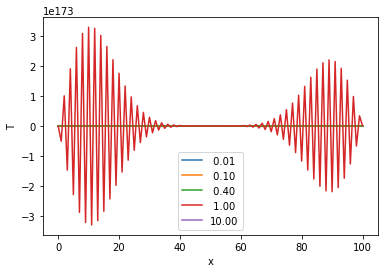

In [13]:
# forward-time centered-space: gradient + euler
L = 0.01
D = 4.25e-6 # thermal diffusivity
N = 100
a = L/N # unit spacing
h = 5e-3 # time step
eps = h/1000

T_l = 0
T_m = 20
T_h = 50

t_val = np.array([0.01, 0.1, 0.4, 1, 10])

T = np.zeros(N+1, float)
T[0], T[N] = T_h, T_l
T[1:N] = T_m
Tp = np.zeros_like(T)
Tp[0], Tp[N] = T_h, T_l

t = 0
c = h*D/a**2
while t < t_val[4]+eps:
    for i in range (1, N): # 1 ~ N-1
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T, Tp = Tp, T
    t = t + h
    for i in range (5):
        if abs(t-t_val[i])<eps: plt.plot(T, label='%5.2f'%t_val[i])
plt.xlabel('x')
plt.ylabel('T')
plt.legend()

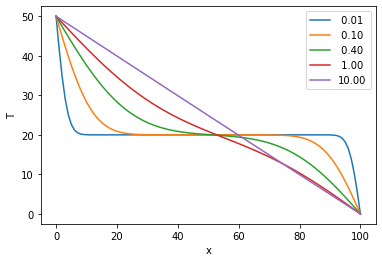

In [20]:
# cranck-nicolson method
L = 0.01
D = 4.25e-6 # thermal diffusivity
N = 100
a = L/N # unit spacing
h = 1e-3 # time step
eps = h/1000

T_l = 0
T_m = 20
T_h = 50

LHS = 2*a**2/(h*D) + 2
RHS = 2*a**2/(h*D) - 2

T = np.zeros(N+1, float)
T[0], T[N] = T_h, T_l
T[1:N] = T_m
Tp = np.zeros_like(T)
Tp[0], Tp[N] = T_h, T_l

M = np.zeros((N-1, N-1))
np.fill_diagonal(M, LHS)
np.fill_diagonal(M[1:,:], -1)
np.fill_diagonal(M[:, 1:], -1)

t = 0
while t < t_val[4]+eps:
    Tp[1:-1] = T[:-2] + RHS*T[1:-1] + T[2:]
    Tp[1] += T[0]
    Tp[-2] +=T[-1]
    Tp[1:-1] = np.linalg.solve(M, Tp[1:-1])
    T, Tp = Tp, T
    t += h
    for i in range (5):
        if abs(t-t_val[i])<eps: plt.plot(T, label='%5.2f'%t_val[i])
plt.xlabel('x')
plt.ylabel('T')
plt.legend()